In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [125]:
# Load in csv
crimes_df = pd.read_csv("Chicago_Crimes_2012_to_2017_v2.csv", index_col="Date")
crimes_df.head()

,Unnamed: 0,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [106]:
crimes_df.shape

(1456714, 22)

In [107]:
print(type(crimes_df))

<class 'pandas.core.frame.DataFrame'>


In [108]:
crimes_df = crimes_df.iloc[:, 3: ]
crimes_df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,
05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [109]:
crimes_df.index = pd.to_datetime(crimes_df.index)

In [ ]:
print(crimes_df.shape)
print(crimes_df.head())

In [111]:
s = crimes_df[['Primary Type']]

In [112]:
s.head()

,Primary Type
Date,
2016-05-03 23:40:00,BATTERY
2016-05-03 21:40:00,BATTERY
2016-05-03 23:31:00,PUBLIC PEACE VIOLATION
2016-05-03 22:10:00,BATTERY
2016-05-03 22:00:00,THEFT


In [113]:
crime_count = pd.DataFrame(s.groupby('Primary Type').size().sort_values(ascending=False).rename('counts').reset_index())

In [114]:
crime_count.head()

,Primary Type,counts
0,THEFT,329460
1,BATTERY,263700
2,CRIMINAL DAMAGE,155455
3,NARCOTICS,135240
4,ASSAULT,91289


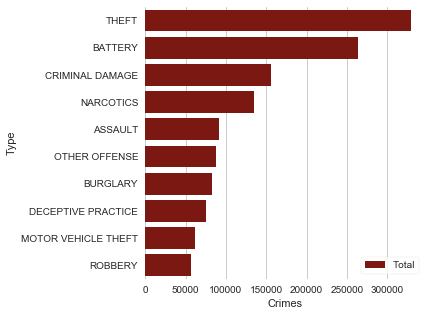

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))


# Plot the total crashes
sns.set_color_codes("dark")
sns.barplot(x="counts", y="Primary Type", data=crime_count.iloc[:10, :],
            label="Total", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Type",
       xlabel="Crimes")
sns.despine(left=True, bottom=True)

# Add a legend and informative axis label
plt.show()

In [116]:
crimes_2012 = crimes_df.loc['2012']
crimes_2013 = crimes_df.loc['2013']
crimes_2014 = crimes_df.loc['2014']
crimes_2015 = crimes_df.loc['2015']
crimes_2016 = crimes_df.loc['2016']
crimes_2017 = crimes_df.loc['2017']

## Yearly crimes
arrest_yearly = crimes_df[crimes_df['Arrest'] == True]['Arrest']

print(arrest_yearly.head())

Date
2016-05-03 23:40:00    True
2016-05-03 21:44:00    True
2016-05-03 23:11:00    True
2016-05-04 11:15:00    True
2016-05-04 11:30:00    True
Name: Arrest, dtype: bool


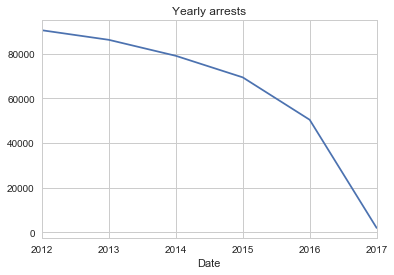

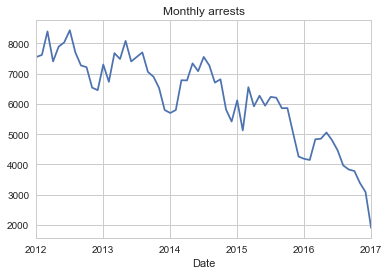

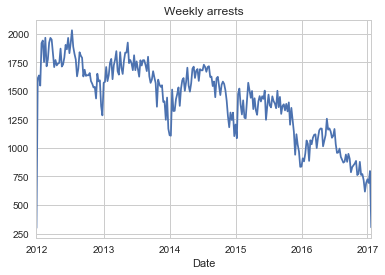

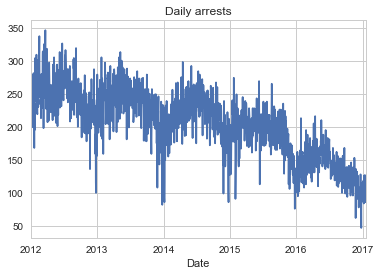

In [117]:
plt.subplot()
# yearly arrest
arrest_yearly.resample('A').sum().plot()
plt.title('Yearly arrests')
plt.show()
# Monthly arrest
arrest_yearly.resample('M').sum().plot()
plt.title('Monthly arrests')
plt.show()
# Weekly arrest
arrest_yearly.resample('W').sum().plot()
plt.title('Weekly arrests')
plt.show()
# daily arrest
arrest_yearly.resample('D').sum().plot()
plt.title('Daily arrests')
plt.show()
plt.show()

In [118]:
theft_2015 = pd.DataFrame(crimes_2015[crimes_2015['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2016 = pd.DataFrame(crimes_2016[crimes_2016['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])
theft_2017 = pd.DataFrame(crimes_2017[crimes_2017['Primary Type'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT'])]['Primary Type'])

In [149]:
crimes_df["Location"].isnull().sum()

37083

In [150]:
crimes_df["Location"].replace('', np.nan, inplace=True)

In [151]:
crimes_df.dropna(subset=["Location"], inplace=True)

In [152]:
crimes_df["Location"].isnull().sum()

0

In [153]:
chicago_crimes_df = crimes_df [["ID","Case Number","Primary Type", "Description","Location", "Arrest","Year"]]
chicago_crimes_df.head()

,ID,Case Number,Primary Type,Description,Location,Arrest,Year
Date,,,,,,,
05/03/2016 11:40:00 PM,10508693,HZ250496,BATTERY,DOMESTIC BATTERY SIMPLE,"(41.864073157, -87.706818608)",True,2016
05/03/2016 09:40:00 PM,10508695,HZ250409,BATTERY,DOMESTIC BATTERY SIMPLE,"(41.782921527, -87.60436317)",False,2016
05/03/2016 11:31:00 PM,10508697,HZ250503,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,"(41.894908283, -87.758371958)",False,2016
05/03/2016 10:10:00 PM,10508698,HZ250424,BATTERY,SIMPLE,"(41.885686845, -87.749515983)",False,2016
05/03/2016 10:00:00 PM,10508699,HZ250455,THEFT,$500 AND UNDER,"(41.886297242, -87.761750709)",False,2016


In [154]:
chicago_crimes_df.rename(columns={"Primary Type": "Crime Type", "Description": "Crime Description"},inplace=True)

C:\Users\asanj\Anaconda3\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [155]:
chicago_crimes_df.head()

,ID,Case Number,Crime Type,Crime Description,Location,Arrest,Year
Date,,,,,,,
05/03/2016 11:40:00 PM,10508693,HZ250496,BATTERY,DOMESTIC BATTERY SIMPLE,"(41.864073157, -87.706818608)",True,2016
05/03/2016 09:40:00 PM,10508695,HZ250409,BATTERY,DOMESTIC BATTERY SIMPLE,"(41.782921527, -87.60436317)",False,2016
05/03/2016 11:31:00 PM,10508697,HZ250503,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,"(41.894908283, -87.758371958)",False,2016
05/03/2016 10:10:00 PM,10508698,HZ250424,BATTERY,SIMPLE,"(41.885686845, -87.749515983)",False,2016
05/03/2016 10:00:00 PM,10508699,HZ250455,THEFT,$500 AND UNDER,"(41.886297242, -87.761750709)",False,2016


In [156]:
chicago_crimes_df.groupby("Crime Type").count()

,ID,Case Number,Crime Description,Location,Arrest,Year
Crime Type,,,,,,
ARSON,2175,2175,2175,2175,2175,2175
ASSAULT,89512,89512,89512,89512,89512,89512
BATTERY,258945,258945,258945,258945,258945,258945
BURGLARY,81673,81673,81673,81673,81673,81673
CONCEALED CARRY LICENSE VIOLATION,84,84,84,84,84,84
CRIM SEXUAL ASSAULT,6298,6298,6298,6298,6298,6298
CRIMINAL DAMAGE,152817,152817,152817,152817,152817,152817
CRIMINAL TRESPASS,36432,36432,36432,36432,36432,36432
DECEPTIVE PRACTICE,68356,68356,68356,68356,68356,68356


In [165]:
chicago_crimes_df.groupby("Year").count()

,ID,Case Number,Crime Type,Crime Description,Location,Arrest
Year,,,,,,
2012,334753,334753,334753,334753,334753,334753
2013,304315,304315,304315,304315,304315,304315
2014,269465,269465,269465,269465,269465,269465
2015,259795,259795,259795,259795,259795,259795
2016,251273,251273,251273,251273,251273,251273
2017,30,30,30,30,30,30


In [160]:
chicago_crimes_df.groupby("Crime Type").sum()

,ID,Arrest,Year
Crime Type,,,
ARSON,21077662745,215.0,4380604
ASSAULT,862450327212,21182.0,180272560
BATTERY,2488534414249,59999.0,521489071
BURGLARY,778925977557,4429.0,164466235
CONCEALED CARRY LICENSE VIOLATION,861812850,72.0,169280
CRIM SEXUAL ASSAULT,60968853514,762.0,12684143
CRIMINAL DAMAGE,1470154201165,10077.0,307759856
CRIMINAL TRESPASS,349015111871,25717.0,73368289
DECEPTIVE PRACTICE,663927040691,8790.0,137673835


In [163]:
chicago_crimes_df.groupby("Year").count()

,ID,Case Number,Crime Type,Crime Description,Location,Arrest
Year,,,,,,
2012,334753,334753,334753,334753,334753,334753
2013,304315,304315,304315,304315,304315,304315
2014,269465,269465,269465,269465,269465,269465
2015,259795,259795,259795,259795,259795,259795
2016,251273,251273,251273,251273,251273,251273
2017,30,30,30,30,30,30


In [166]:
chicago_crimes_df.to_csv('chicago_crimes.csv')